
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\maxim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\maxim\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1
test columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 TRAIN: 1,296,675 rows × 22 columns
 TEST: 555,719 rows × 22 columns

 Columns:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 

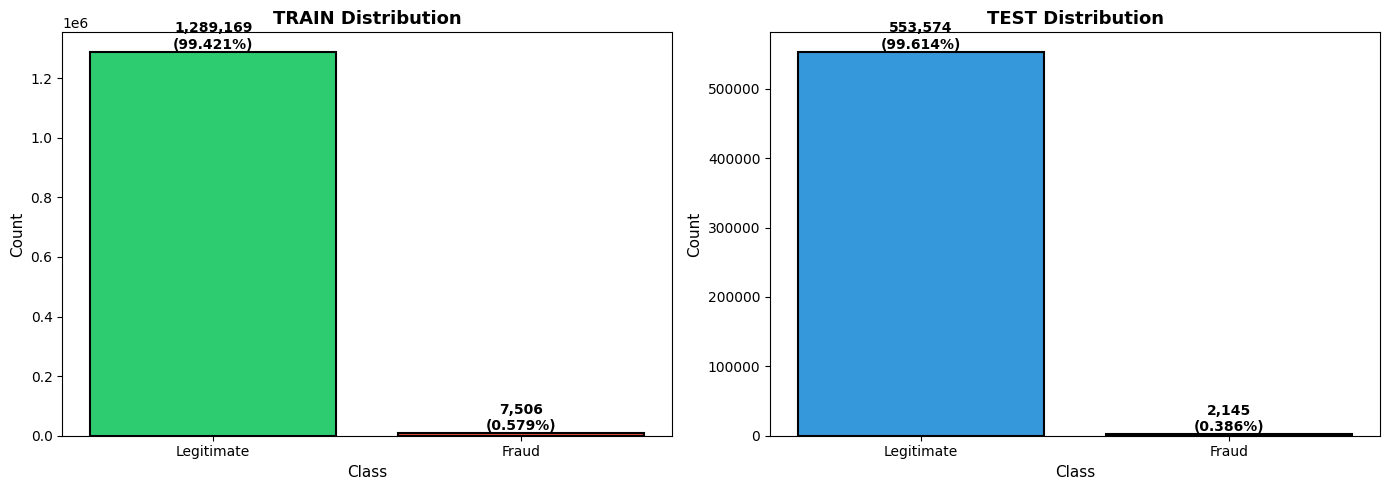


4. KEY FEATURES

 Feature types:
   Numeric: 9
   Categorical: 12

 Amount (amt) statistics:
   Mean: $70.35
   Median: $47.52
   Std: $160.32
   Range: $1.00 - $28948.90

   By class:
   Legitimate: $67.67
   Fraud: $531.32

 Time period:
   From: 2019-01-01 00:00:18
   To: 2020-06-21 12:13:37
   Duration: 537 days

5. DESCRIPTIVE STATISTICS

 Numeric features summary:
                    mean           std           min           max
cc_num      4.171920e+17  1.308806e+18  6.041621e+10  4.992346e+18
amt         7.035104e+01  1.603160e+02  1.000000e+00  2.894890e+04
zip         4.880067e+04  2.689322e+04  1.257000e+03  9.978300e+04
lat         3.853762e+01  5.075808e+00  2.002710e+01  6.669330e+01
long       -9.022634e+01  1.375908e+01 -1.656723e+02 -6.795030e+01
city_pop    8.882444e+04  3.019564e+05  2.300000e+01  2.906700e+06
unix_time   1.349244e+09  1.284128e+07  1.325376e+09  1.371817e+09
merch_lat   3.853734e+01  5.109788e+00  1.902779e+01  6.751027e+01
merch_long -9.022646e+0


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\maxim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\maxim\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1
test columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 TRAIN: 1,296,675 rows × 22 columns
 TEST: 555,719 rows × 22 columns

 Columns:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 

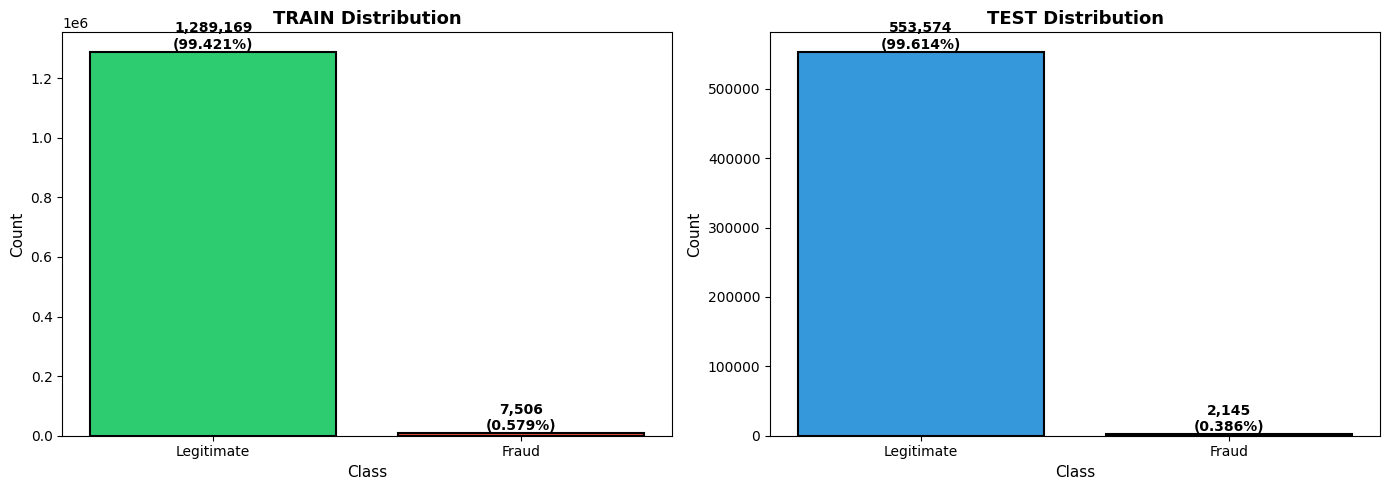


4. KEY FEATURES

 Feature types:
   Numeric: 9
   Categorical: 12

 Amount (amt) statistics:
   Mean: $70.35
   Median: $47.52
   Std: $160.32
   Range: $1.00 - $28948.90

   By class:
   Legitimate: $67.67
   Fraud: $531.32

 Time period:
   From: 2019-01-01 00:00:18
   To: 2020-06-21 12:13:37
   Duration: 537 days

5. DESCRIPTIVE STATISTICS

 Numeric features summary:
                    mean           std           min           max
cc_num      4.171920e+17  1.308806e+18  6.041621e+10  4.992346e+18
amt         7.035104e+01  1.603160e+02  1.000000e+00  2.894890e+04
zip         4.880067e+04  2.689322e+04  1.257000e+03  9.978300e+04
lat         3.853762e+01  5.075808e+00  2.002710e+01  6.669330e+01
long       -9.022634e+01  1.375908e+01 -1.656723e+02 -6.795030e+01
city_pop    8.882444e+04  3.019564e+05  2.300000e+01  2.906700e+06
unix_time   1.349244e+09  1.284128e+07  1.325376e+09  1.371817e+09
merch_lat   3.853734e+01  5.109788e+00  1.902779e+01  6.751027e+01
merch_long -9.022646e+0

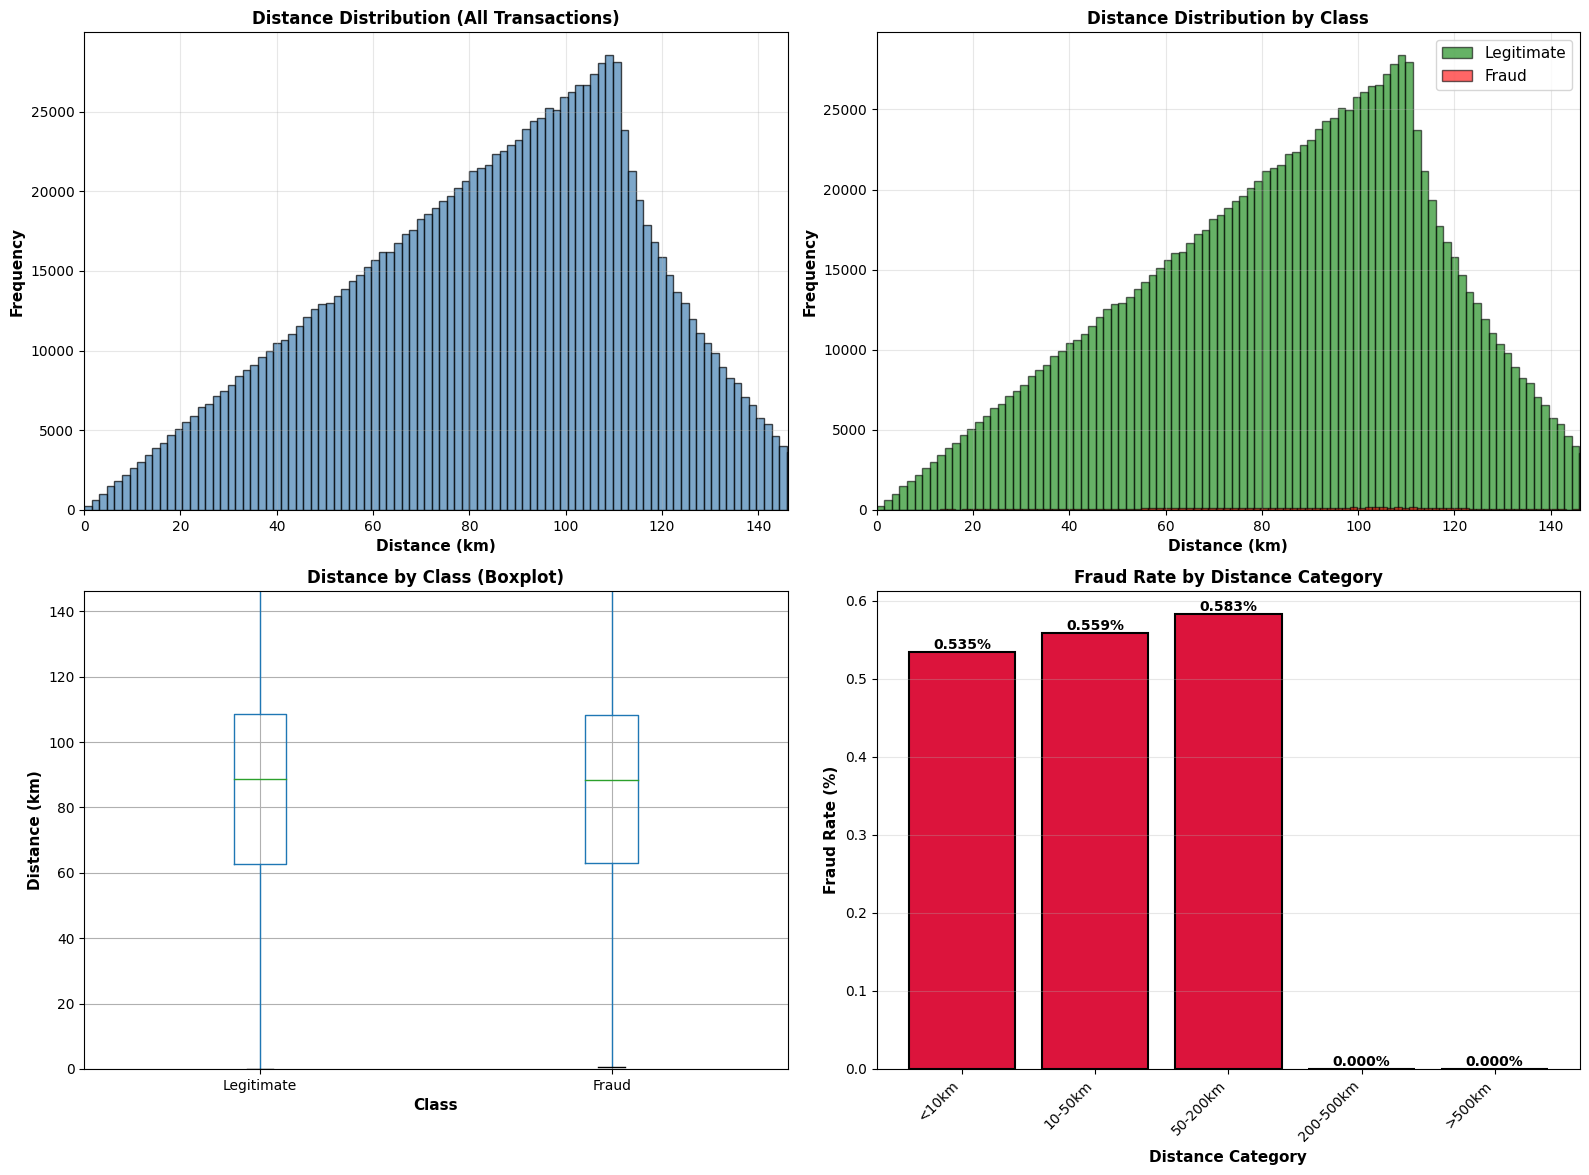


 What we created:
   • distance_km: Euclidean distance between customer and merchant

 Key findings:
   • Mean distance (Legitimate): 84.99 km
   • Mean distance (Fraud): 85.17 km

 Current shapes:
   TRAIN: (1296675, 25)
   TEST: (555719, 25)
Age statistics :
count    1.296675e+06
mean     4.602318e+01
std      1.734874e+01
min      1.800000e+01
25%      3.259959e+01
50%      4.396988e+01
75%      5.707050e+01
max      9.563860e+01
Name: age, dtype: float64
count    555719.000000
mean         46.905700
std          17.400883
min          18.000000
25%          33.448323
50%          44.908966
75%          58.056126
max          96.169747
Name: age, dtype: float64

Distribution :
age_category
Adults (25-50)    718038
Old (>50)         456949
Young (18-25)     121688
Name: count, dtype: int64
age_category
Adults (25-50)    304430
Old (>50)         204922
Young (18-25)      46367
Name: count, dtype: int64

Mean age for each category :
           mean  median    std
is_fraud             

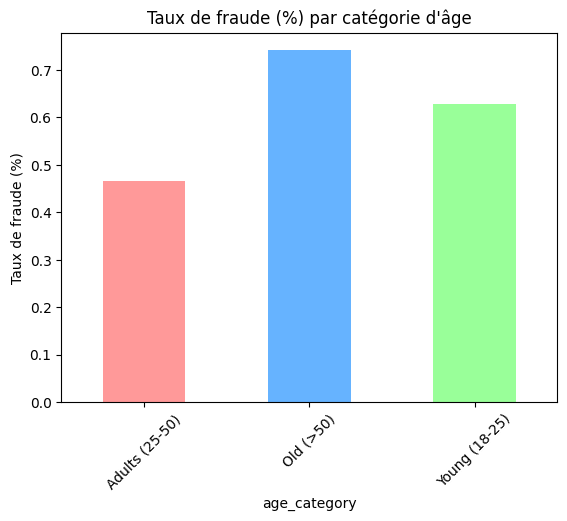


 Categorical columns : 7
 •merchant: 693 unique values
 •category: 14 unique values
 •gender: 2 unique values
 •city: 894 unique values
 •state: 51 unique values
 •job: 494 unique values
 •age_category: 3 unique values

 Gender encoded:
F -> 0
M -> 1

 After encoding:
gender
0    709863
1    586812
Name: count, dtype: int64

 Split complété (avant encodage cible):
   Train full: (1037340, 25) - pour encodage et training
   Validation: (259335, 25) - pour tuning
   Test: (555719, 26) - final eval (inchangé)

 Vérif distribution classes:
   Train full: 6,005 fraudes / 1,037,340 = 0.579%
   Val: 1,501 fraudes / 259,335 = 0.579%
   Test: 2,145 fraudes / 555,719 = 0.386%
    Attention: Légères différences

 Split complété (avant encodage cible):
   Train full: (1037340, 25) - pour encodage et training
   Validation: (259335, 25) - pour tuning
   Test: (555719, 26) - final eval (inchangé)

 Vérif distribution classes:
   Train full: 6,005 fraudes / 1,037,340 = 0.579%
   Val: 1,501 fraudes /

In [2]:
%run eda_analysis.ipynb
%run preprocessing_loader_v2.ipynb

# Modules 

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (f1_score, precision_score, recall_score,roc_auc_score,average_precision_score,confusion_matrix,classification_report, accuracy_score)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna

# Gradient Boosting Classifier

In [4]:
gbc = GradientBoostingClassifier(
    n_estimators=50,       # nombre d’arbres
    learning_rate=0.1,      # taux d’apprentissage
    max_depth=3,            # profondeur max des arbres
    random_state=42
)


---

# Without SMOTE and without optimization

---

# Training

In [5]:
X_train = X_train_full
y_train = y_train_full

# Calculate scale_pos_weight
scale = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Class imbalance ratio : {scale:.1f}:1")
print(f"scale_pos_weight: {scale:.1f}")

Class imbalance ratio : 171.7:1
scale_pos_weight: 171.7


In [6]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

# Predictions

In [7]:
X_test = X_val
y_test = y_val

In [8]:
y_pred = gbc.predict(X_test)

# Evaluate

In [9]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy du Gradient Boosting : {acc:.4f}\n")


print("Report of classifier :")
y_pred_base_new = gbc.predict(X_test)
y_pred_proba_base_new = gbc.predict_proba(X_test)[:,1]

print(f"F1-Score:          {f1_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Precision:         {precision_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Recall:            {recall_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"ROC-AUC:           {roc_auc_score(y_test, y_pred_proba_base_new)*100:.4f} %")
print(f"PR-AUC:            {average_precision_score(y_test, y_pred_proba_base_new)*100:.4f} %")

Accuracy du Gradient Boosting : 0.9960

Report of classifier :
F1-Score:          55.6559 %
Precision:         78.5194 %
Recall:            43.1046 %
ROC-AUC:           97.0429 %
PR-AUC:            55.8883 %


# Confusion Matrix

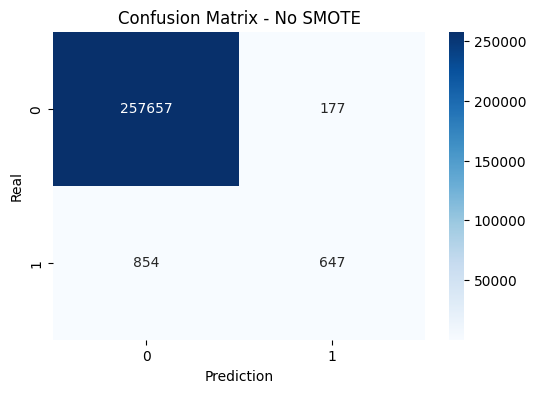

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - No SMOTE")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

---

# Without SMOTE and with optimization

---

In [11]:
def objective(trial):
    # Espace de recherche des hyperparamètres
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 3),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }
    
    # Modèle
    model = GradientBoostingClassifier(**params, random_state=42)

    # Validation croisée pour évaluer la performance moyenne
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    return scores.mean()  # objectif : maximiser la précision moyenne


In [12]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Test number :", len(study.trials))
print("Best score :", study.best_value)
print("Best hyperparam :", study.best_params)

[I 2025-10-30 13:33:28,491] A new study created in memory with name: no-name-e19fe3ab-0b23-4d9d-a03c-aab372650ee7


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-10-30 13:42:23,354] Trial 0 finished with value: 0.9947365376829198 and parameters: {'n_estimators': 37, 'learning_rate': 0.18025314787111948, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 1, 'subsample': 0.7617332451253829}. Best is trial 0 with value: 0.9947365376829198.
[I 2025-10-30 13:45:40,479] Trial 1 finished with value: 0.994211155455299 and parameters: {'n_estimators': 12, 'learning_rate': 0.004766328551310846, 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 12, 'subsample': 0.8020253629289302}. Best is trial 0 with value: 0.9947365376829198.
[I 2025-10-30 13:54:02,682] Trial 2 finished with value: 0.994211155455299 and parameters: {'n_estimators': 24, 'learning_rate': 0.0016597558791149212, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 13, 'subsample': 0.6464120284249035}. Best is trial 0 with value: 0.9947365376829198.
[I 2025-10-30 14:05:30,598] Trial 3 finished with value: 0.9966423737636647 and parameters: {'n_estimators

In [13]:
best_model = GradientBoostingClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Precision :", accuracy_score(y_test, y_pred))


Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.89      0.64      0.74      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.82      0.87    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix :
 [[257711    123]
 [   541    960]]
Precision : 0.9974396051439258


In [14]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy du Gradient Boosting : {acc:.4f}\n")


print("Report of classifier :")
y_pred_base_new = gbc.predict(X_test)
y_pred_proba_base_new = gbc.predict_proba(X_test)[:,1]

print(f"F1-Score    :   {f1_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Precision   :   {precision_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"Recall      :   {recall_score(y_test, y_pred_base_new)*100:.4f} %")
print(f"ROC-AUC     :   {roc_auc_score(y_test, y_pred_proba_base_new)*100:.4f} %")
print(f"PR-AUC      :   {average_precision_score(y_test, y_pred_proba_base_new)*100:.4f} %")

Accuracy du Gradient Boosting : 0.9974

Report of classifier :
F1-Score    :   55.6559 %
Precision   :   78.5194 %
Recall      :   43.1046 %
ROC-AUC     :   97.0429 %
PR-AUC      :   55.8883 %


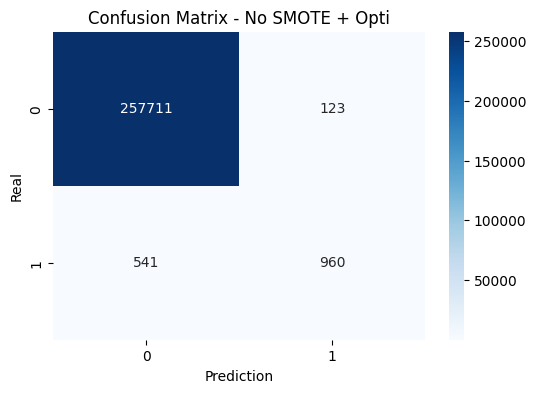

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - No SMOTE + Opti")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

---

# With SMOTE and without optimization

---

In [16]:
X_train_smote = X_train_resampled
y_train_smote = y_train_resampled

In [17]:
gbc.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(n_estimators=50, random_state=42)

# Predictions

In [18]:
y_pred = gbc.predict(X_test)

In [19]:
print(f"\n BEFORE SMOTE:")
print(f"   Class 0 (legitimate): {(y_train == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train == 1).sum():,}")
print(f"   Ratio: {(y_train == 0).sum() / (y_train == 1).sum():.1f}:1")

print(f"\n Size changes:")
print(f"   Before: {X_train.shape[0]:,} samples")
print(f"   After:  {X_train.shape[0]:,} samples")
print(f"   Added:  {X_train.shape[0] - X_train.shape[0]:,} synthetic frauds")

# Convert back to DataFrame (SMOTE returns numpy arrays)
X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train, name='is_fraud')


 BEFORE SMOTE:
   Class 0 (legitimate): 1,031,335
   Class 1 (fraud):      6,005
   Ratio: 171.7:1

 Size changes:
   Before: 1,037,340 samples
   After:  1,037,340 samples
   Added:  0 synthetic frauds


In [20]:
print(f"\n AFTER SMOTE:")
print(f"   Class 0 (legitimate): {(y_train_smote == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train_smote == 1).sum():,}")
print(f"   Ratio: {(y_train_smote == 0).sum() / (y_train_smote == 1).sum():.1f}:1")

print(f"\n Size changes:")
print(f"   Before: {X_train_smote.shape[0]:,} samples")
print(f"   After:  {X_train_smote.shape[0]:,} samples")
print(f"   Added:  {X_train_smote.shape[0] - X_train_smote.shape[0]:,} synthetic frauds")

# Convert back to DataFrame (SMOTE returns numpy arrays)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote = pd.Series(y_train_smote, name='is_fraud')


 AFTER SMOTE:
   Class 0 (legitimate): 1,031,335
   Class 1 (fraud):      309,400
   Ratio: 3.3:1

 Size changes:
   Before: 1,340,735 samples
   After:  1,340,735 samples
   Added:  0 synthetic frauds


In [21]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy du Gradient Boosting : {acc:.4f}\n")


print("Report of classifier :")
y_pred_base_new_smote = gbc.predict(X_test)
y_pred_proba_base_new_smote = gbc.predict_proba(X_test)[:,1]

print(f"F1-Score    :   {f1_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"Precision   :   {precision_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"Recall      :   {recall_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"ROC-AUC     :   {roc_auc_score(y_test, y_pred_proba_base_new_smote)*100:.4f} %")
print(f"PR-AUC      :   {average_precision_score(y_test, y_pred_proba_base_new_smote)*100:.4f} %")

Accuracy du Gradient Boosting : 0.9882

Report of classifier :
F1-Score    :   43.9802 %
Precision   :   30.3337 %
Recall      :   79.9467 %
ROC-AUC     :   98.1901 %
PR-AUC      :   65.8676 %


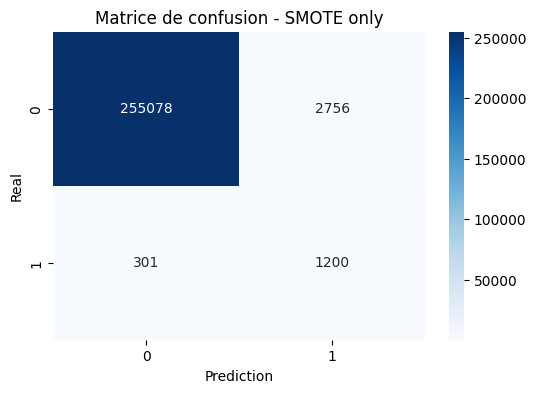

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SMOTE only")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

---

# With SMOTE and with optimization

---

In [23]:
def objective(trial):
    # Espace de recherche des hyperparamètres
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 50),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 3),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }
    
    # Modèle
    model = GradientBoostingClassifier(**params, random_state=42)

    # Validation croisée pour évaluer la performance moyenne
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

    return scores.mean()  # objectif : maximiser la précision moyenne


In [24]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Test number :", len(study.trials))
print("Best score :", study.best_value)
print("Best hyperparam :", study.best_params)

[I 2025-10-30 20:53:57,897] A new study created in memory with name: no-name-afed9c5c-e9b4-496f-a8b9-d02cf1a3a350


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-10-30 21:01:50,795] Trial 0 finished with value: 0.7692310560998259 and parameters: {'n_estimators': 20, 'learning_rate': 0.003508828932764386, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 18, 'subsample': 0.7017268309439078}. Best is trial 0 with value: 0.7692310560998259.
[I 2025-10-30 21:05:18,989] Trial 1 finished with value: 0.9244757539707698 and parameters: {'n_estimators': 13, 'learning_rate': 0.22445963209219139, 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 5, 'subsample': 0.9394742453168312}. Best is trial 1 with value: 0.9244757539707698.
[I 2025-10-30 21:06:01,361] Trial 2 finished with value: 0.7692310560998259 and parameters: {'n_estimators': 2, 'learning_rate': 0.0011628474237439794, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 17, 'subsample': 0.5124957021398386}. Best is trial 1 with value: 0.9244757539707698.
[I 2025-10-30 21:13:29,065] Trial 3 finished with value: 0.9211223694466095 and parameters: {'n_estimators'

In [25]:
best_model = GradientBoostingClassifier(**study.best_params, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test)

In [26]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy du Gradient Boosting : {acc:.4f}\n")


print("Report of classifier :")
y_pred_base_new_smote = gbc.predict(X_test)
y_pred_proba_base_new_smote = gbc.predict_proba(X_test)[:,1]

print(f"F1-Score    :   {f1_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"Precision   :   {precision_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"Recall      :   {recall_score(y_test, y_pred_base_new_smote)*100:.4f} %")
print(f"ROC-AUC     :   {roc_auc_score(y_test, y_pred_proba_base_new_smote)*100:.4f} %")
print(f"PR-AUC      :   {average_precision_score(y_test, y_pred_proba_base_new_smote)*100:.4f} %")

Accuracy du Gradient Boosting : 0.9937

Report of classifier :
F1-Score    :   43.9802 %
Precision   :   30.3337 %
Recall      :   79.9467 %
ROC-AUC     :   98.1901 %
PR-AUC      :   65.8676 %


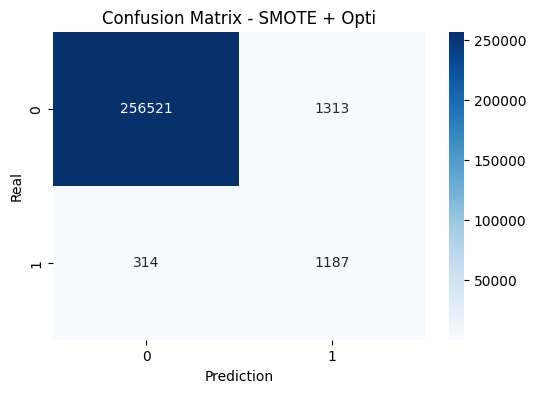

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SMOTE + Opti")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

---

# Visualisation (hist)

---

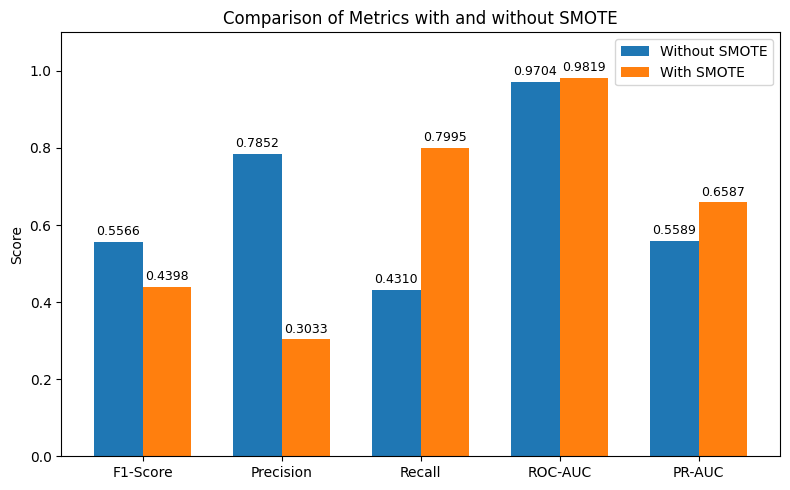

In [28]:
import numpy as np
# --- Données d'exemple (à remplacer par tes vraies valeurs) ---
metrics = ['F1-Score', 'Precision', 'Recall', 'ROC-AUC', 'PR-AUC']
without_smote = [f1_score(y_test, y_pred_base_new), precision_score(y_test, y_pred_base_new), recall_score(y_test, y_pred_base_new), roc_auc_score(y_test, y_pred_proba_base_new), average_precision_score(y_test, y_pred_proba_base_new)]
with_smote = [f1_score(y_test, y_pred_base_new_smote), precision_score(y_test, y_pred_base_new_smote), recall_score(y_test, y_pred_base_new_smote), roc_auc_score(y_test, y_pred_proba_base_new_smote), average_precision_score(y_test, y_pred_proba_base_new_smote)]

# --- Positionnement des barres ---
x = np.arange(len(metrics))
width = 0.35  # largeur des barres

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, without_smote, width, label='Without SMOTE')
bars2 = ax.bar(x + width/2, with_smote, width, label='With SMOTE')

# --- Ajout des détails ---
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics with and without SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Ajouter les valeurs au-dessus des barres
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', 
                ha='center', va='bottom', fontsize=9)

# --- Ajustement et affichage ---
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()
